Accuracy for Model - Training Set: 0.911875
Accuracy for Model - Test Set: 0.7307213930348259
Accuracy for Model - Validation Set: 0.7443181818181818
MultinomialNB(alpha=0.1)


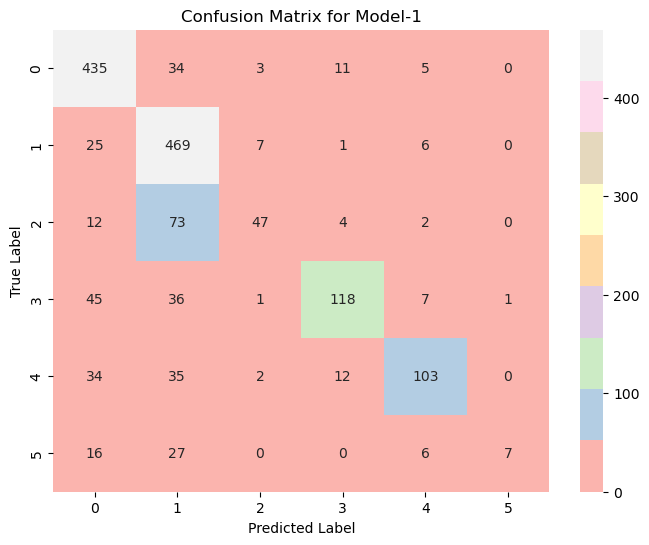

In [48]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

# Define the preprocess_text function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = text.replace('\n', ' ')
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# Load and preprocess the text data
corpus = pd.read_csv('C:/Users/hp/Downloads/Emotions_training.csv')['text'].apply(preprocess_text)

# Convert the Text corpus to a matrix of word counts
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(corpus)
y = pd.read_csv('C:/Users/hp/Downloads/Emotions_training.csv')['label']

# Divide the dataset into Train, Test, and Validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

# Define a function to build and evaluate the model
def build_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    y_pred_val = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    print("Accuracy for Model - Training Set:", train_accuracy)
    print("Accuracy for Model - Test Set:", test_accuracy)
    print("Accuracy for Model - Validation Set:", val_accuracy)
    
    return best_model

# Model 1: Naive Bayes
nb_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
nb_model = MultinomialNB()
best_nb_model = build_and_evaluate_model(nb_model, nb_param_grid, X_train, y_train, X_test, y_test)
print(best_nb_model)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
y_pred_val = best_nb_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred_val)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Pastel1', fmt='g')
plt.title('Confusion Matrix for Model-1')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy for Model - Training Set: 0.9979464285714286
Accuracy for Model - Test Set: 0.8429726368159204
Accuracy for Model - Validation Set: 0.8415404040404041
RandomForestClassifier()


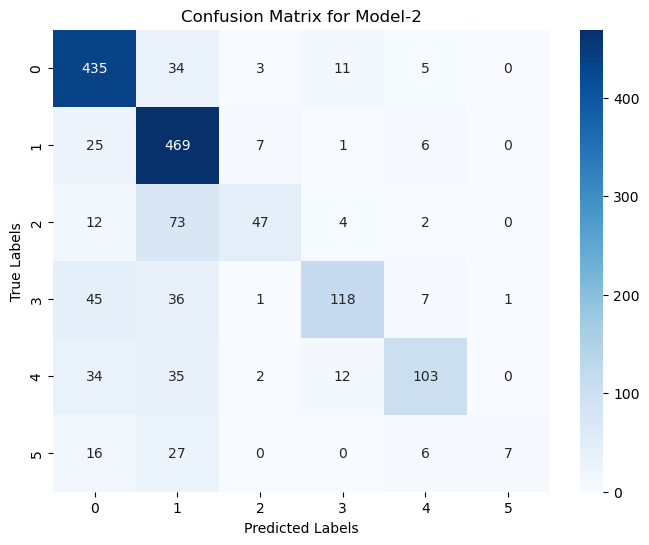

In [46]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Define the preprocess_text function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = text.replace('\n', ' ')
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# Load and preprocess the text data
corpus = pd.read_csv('C:/Users/hp/Downloads/Emotions_training.csv')['text'].apply(preprocess_text)

# Convert the Text corpus to a matrix of word counts
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(corpus)
y = pd.read_csv('C:/Users/hp/Downloads/Emotions_training.csv')['label']

# Divide the dataset into Train, Test, and Validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

# Define a function to build and evaluate the model
def build_and_evaluate_model(model, X_train, y_train, X_test, y_test, X_val, y_val):
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    y_pred_val = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    print("Accuracy for Model - Training Set:", train_accuracy)
    print("Accuracy for Model - Test Set:", test_accuracy)
    print("Accuracy for Model - Validation Set:", val_accuracy)
    
    return model

# Model 2: Random Forest
rf_model = RandomForestClassifier()
best_rf_model = build_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test, X_val, y_val)
print(best_rf_model)

# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Model-2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy for Model - Training Set: 0.8877678571428571
Accuracy for Model - Test Set: 0.8634950248756219
Accuracy for Model - Validation Set: 0.8630050505050505
LogisticRegression(penalty='l1', solver='liblinear')


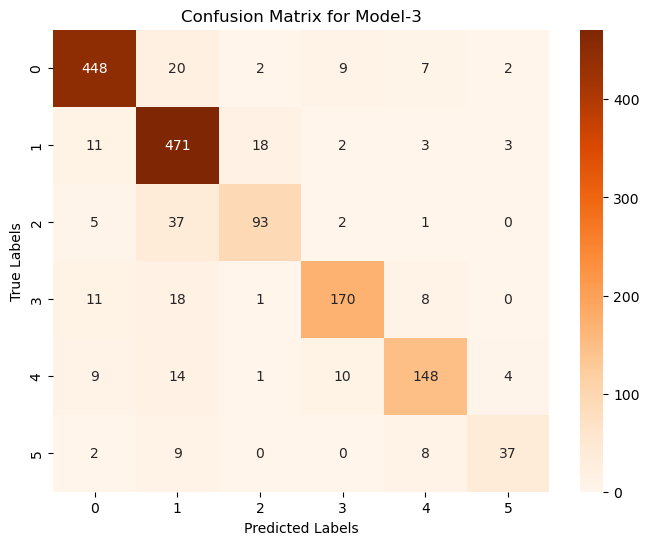

In [43]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Define the preprocess_text function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = text.replace('\n', ' ')
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# Load and preprocess the text data
corpus = pd.read_csv('C:/Users/hp/Downloads/Emotions_training.csv')['text'].apply(preprocess_text)

# Convert the Text corpus to a matrix of word counts
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(corpus)
y = pd.read_csv('C:/Users/hp/Downloads/Emotions_training.csv')['label']

# Divide the dataset into Train, Test, and Validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

# Define a function to build and evaluate the model
def build_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    y_pred_val = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    print("Accuracy for Model - Training Set:", train_accuracy)
    print("Accuracy for Model - Test Set:", test_accuracy)
    print("Accuracy for Model - Validation Set:", val_accuracy)
    
    return best_model

# Model 3: Logistic Regression
lr_param_grid = {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']}
lr_model = LogisticRegression(solver='liblinear')
best_lr_model = build_and_evaluate_model(lr_model, lr_param_grid, X_train, y_train, X_test, y_test)
print(best_lr_model)

# Create a confusion matrix
y_pred_val = best_lr_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred_val)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')
plt.title('Confusion Matrix for Model-3')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()